<a href="https://colab.research.google.com/github/MrCalmTam/AI_ANN/blob/main/CIFAR_10_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.utils import to_categorical #Onehot encoding convert

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [3]:

(x_train,y_train),(x_test,y_test)= cifar10.load_data()

x_train.shape
y_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 1)

In [4]:

x_test.shape

(10000, 32, 32, 3)

In [5]:

y_test.shape

(10000, 1)

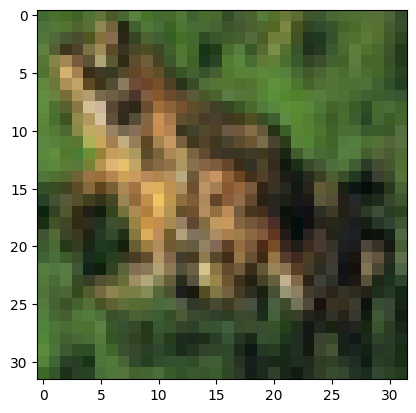

Số này là: [6]


In [6]:
a= x_train[5355]
plt.imshow(a)
plt.show()
print('Số này là:',y_train[5355])

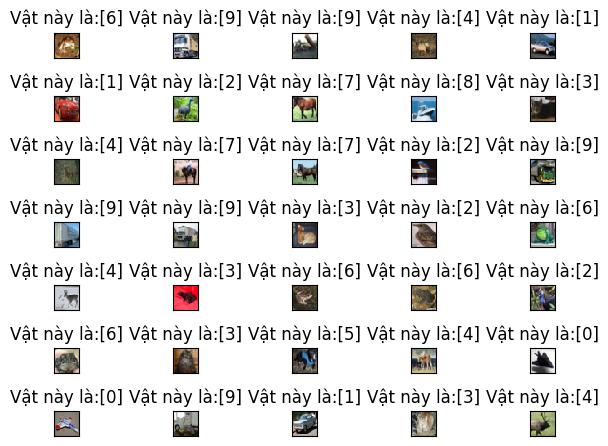

In [7]:

for i in range(35):
  plt.subplot(7,5,i+1)#
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title('Vật này là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
     

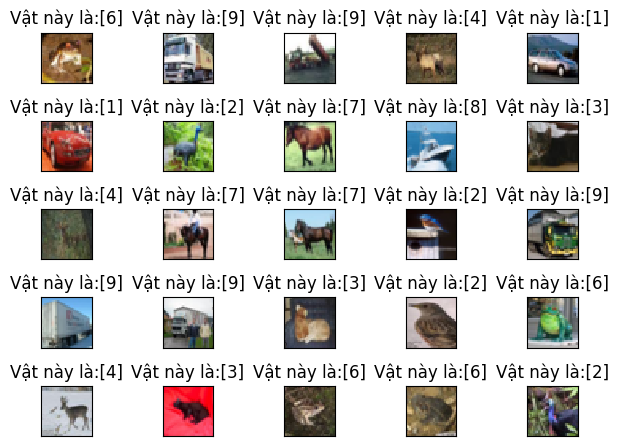

In [9]:
for i in range(25):
  plt.subplot(5,5,i+1)#
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='None')
  plt.title('Vật này là:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [10]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))#them 1 lop 512 newral
model.add(Dense(512,activation='relu',input_shape=(512,)))
model.add(Dense(512,activation='relu',input_shape=(512,)))
model.add(Dense(512,activation='relu',input_shape=(512,)))
model.add(Dense(512,activation='relu',input_shape=(512,)))
model.add(Dense(512,activation='relu',input_shape=(512,)))
model.add(Dense(10,activation='softmax'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 10)                5

In [11]:

x_train=x_train.reshape((50000,32*32*3))#anh gray gtri tu 0-255
x_train=x_train.astype('float32')/255 #chia de ve gtri 0/1
print(x_train.shape)
     

(50000, 3072)


In [12]:

x_test=x_test.reshape((10000,32*32*3))# anh gray gtri tu 0-255
x_test=x_test.astype('float32')/255 #chia de ve gtri 0/1
print(x_test.shape)

(10000, 3072)


In [13]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [14]:

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Bộ tối ưu (optimizer),Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(x_train,y_train,epochs=20,batch_size=128) #epochs:so lan hoc, batch_size=128: boc ngau nhien 128 anh trong bo du lieu de hoc 
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)
     

Epoch 1/20
391/391 [==============================] - 30s 73ms/step - loss: 2.0981 - accuracy: 0.2159
Epoch 2/20
391/391 [==============================] - 31s 80ms/step - loss: 1.8988 - accuracy: 0.3074
Epoch 3/20
391/391 [==============================] - 24s 61ms/step - loss: 1.8053 - accuracy: 0.3475
Epoch 4/20
391/391 [==============================] - 23s 60ms/step - loss: 1.7334 - accuracy: 0.3769
Epoch 5/20
391/391 [==============================] - 24s 61ms/step - loss: 1.6804 - accuracy: 0.3980
Epoch 6/20
391/391 [==============================] - 25s 63ms/step - loss: 1.6315 - accuracy: 0.4157
Epoch 7/20
391/391 [==============================] - 24s 62ms/step - loss: 1.5889 - accuracy: 0.4319
Epoch 8/20
391/391 [==============================] - 24s 62ms/step - loss: 1.5520 - accuracy: 0.4464
Epoch 9/20
391/391 [==============================] - 25s 63ms/step - loss: 1.5161 - accuracy: 0.4582
Epoch 10/20
391/391 [==============================] - 24s 61ms/step - loss: 1.482

In [15]:

model.save('test1.h5')

1/1 [==============================] - 0s 116ms/step


array([2])

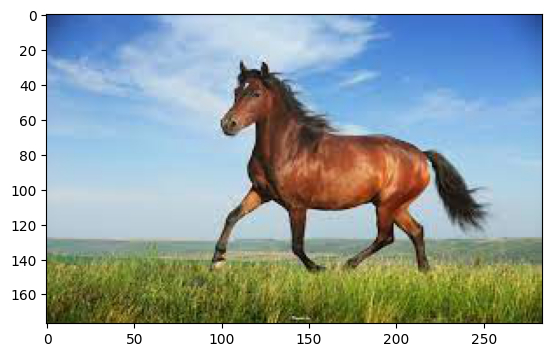

In [18]:
img = Image.open('ngua.jpg')
imshow(img)
img = load_img('ngua.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

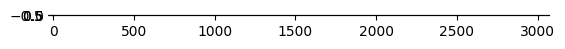

In [19]:

Img=plt.imread('/content/ngua.jpg')
plt.imshow(img)
plt.show()
     

In [20]:

Img=load_img('/content/ngua.jpg',target_size=(32,32))
Img= img_to_array(img)
Img =img.reshape(1,32*32*3)
Img =img.astype('float32')
Img =Img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 22ms/step


array([2])

In [21]:

X=x_test
Y=y_test

In [22]:

X_pred=X[1000].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
model11=load_model('/content/test1.h5')
Y_pred = model11.predict(X_pred)
print(Y_pred)

1/1 [==============================] - 0s 83ms/step
[[2.59441906e-04 9.51852326e-06 7.05731094e-01 7.17667583e-03
  6.50312677e-02 1.16965733e-03 2.20425189e-01 1.51489672e-04
  3.05491048e-05 1.50464575e-05]]
